In [ ]:
import pandas as pd

# Load the dataset to inspect its contents
file_path = '/content/weatherAUS.csv'
data = pd.read_csv(file_path)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
data.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1, inplace=True)
data.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# And we need to replace NaN values with mean values of each column:
import numpy as np

# Convert numeric columns to appropriate data type
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
                'Cloud3pm', 'Temp9am', 'Temp3pm']  # List your numeric columns here

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill NaN values with the mean of each numeric column
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

data.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [ ]:
# Now we can change that day and next days'predictions (yes and no) to 1 and 0:
data.RainToday = [1 if each == 'Yes' else 0 for each in data.RainToday]
data.RainTomorrow = [1 if each == 'Yes' else 0 for each in data.RainTomorrow]
data.sample(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
25917,17.7,24.0,1.0,5.468232,7.611178,26.0,2.0,15.0,87.0,70.0,1017.64994,1015.255889,4.447461,4.50993,20.8,22.8,0,0
133926,-1.2,9.2,0.0,5.468232,7.611178,13.0,6.0,2.0,100.0,81.0,1030.70000,1028.700000,4.447461,4.50993,-0.5,9.0,0,0
67540,5.5,14.3,0.0,1.000000,1.600000,39.0,28.0,17.0,84.0,68.0,1013.40000,1009.100000,5.000000,7.00000,7.1,13.2,0,0


In [ ]:
y = data.RainTomorrow.values
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [ ]:
# In order to scale all the features between 0 and 1:
x = (data - np.min(data)) / (np.max(data) - np.min(data))
x.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.020867,0.029919,0.008671,0.013309,0.015351,0.050024,0.027156,0.030967,0.075750,0.029061,0.968271,0.967699,0.015722,0.012396,0.024202,0.028871,0.008099,0.008099
1,0.015150,0.032015,0.008099,0.013309,0.015351,0.050024,0.011910,0.029061,0.050024,0.031920,0.971034,0.968366,0.012337,0.012396,0.024488,0.031253,0.008099,0.008099
2,0.020391,0.032587,0.008099,0.013309,0.015351,0.051929,0.026203,0.032873,0.044307,0.036684,0.968175,0.969223,0.012337,0.010005,0.028109,0.030205,0.008099,0.008099
3,0.016865,0.034778,0.008099,0.013309,0.015351,0.030967,0.018580,0.016675,0.050977,0.023344,0.977704,0.973130,0.012337,0.012396,0.025345,0.033349,0.008099,0.008099
4,0.024774,0.038876,0.009052,0.013309,0.015351,0.047165,0.014769,0.027156,0.086232,0.039543,0.971224,0.966651,0.014769,0.015722,0.025060,0.036398,0.008099,0.008099


In [ ]:
def initialize_weight_bias(dimension):
    w = np.full((dimension,1), 0.01)    # Create a matrix by the size of (dimension,1) and fill it with the values of 0.01
    b = 0.0
    return w,b

In [ ]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

In [ ]:
def forward_backward_propagation(w, b, x_train, y_train):
    # forward propagation:
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)

    loss = -(1 - y_train) * np.log(1 - y_head) - y_train * np.log(y_head)     # loss function formula
    cost = (np.sum(loss)) / x_train.shape[1]                               # cost function formula

    # backward propagation:
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]

    gradients = {'derivative_weight': derivative_weight, 'derivative_bias': derivative_bias}

    return cost, gradients

In [ ]:
def update(w, b, x_train, y_train, learning_rate, nu_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []

    # Initialize for-back propagation for the number of iteration times. Then updating w and b values and writing the cost values to a list:
    for i in range(nu_of_iteration):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)

        # Update weight and bias values:
        w = w - learning_rate * gradients['derivative_weight']
        b = b - learning_rate * gradients['derivative_bias']
        # Show every 20th value of cost:
        if i % 20 == 0:
            cost_list2.append(cost)
            index.append(i)
            print('Cost after iteration %i: %f' %(i,cost))

    parameters = {'weight': w, 'bias':b}

    # Visulization of cost values:
    plt.plot(index, cost_list2)
    plt.xlabel('Nu of Iteration')
    plt.ylabel('Cost Function Value')
    plt.show()

    return parameters, gradients, cost_list

In [ ]:
def prediction(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1

    return y_prediction

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, nu_of_iteration):
    dimension = x_train.shape[0]
    w, b = initialize_weight_bias(dimension)    # Creating an initial weight matrix of (x_train data[0] x 1)

    # Updating our w and b by using update method.
    # Update method contains our forward and backward propagation.
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, nu_of_iteration)

    # Lets use x_test for predicting y:
    y_test_predictions = prediction(parameters['weight'], parameters['bias'], x_test)

    # Investigate the accuracy:
    print('Test accuracy: {}%'.format(100 - np.mean(np.abs(y_test_predictions - y_test))*100))

Cost after iteration 0: 0.699765
Cost after iteration 20: 0.657872
Cost after iteration 40: 0.626587
Cost after iteration 60: 0.603133
Cost after iteration 80: 0.585458
Cost after iteration 100: 0.572054
Cost after iteration 120: 0.561827
Cost after iteration 140: 0.553974
Cost after iteration 160: 0.547909
Cost after iteration 180: 0.543198
Cost after iteration 200: 0.539521
Cost after iteration 220: 0.536637
Cost after iteration 240: 0.534365
Cost after iteration 260: 0.532569
Cost after iteration 280: 0.531143
Cost after iteration 300: 0.530008
Cost after iteration 320: 0.529102
Cost after iteration 340: 0.528377
Cost after iteration 360: 0.527795
Cost after iteration 380: 0.527326
Cost after iteration 400: 0.526948
Cost after iteration 420: 0.526643
Cost after iteration 440: 0.526396
Cost after iteration 460: 0.526195
Cost after iteration 480: 0.526032
Cost after iteration 500: 0.525900
Cost after iteration 520: 0.525791
Cost after iteration 540: 0.525703
Cost after iteration 560: 

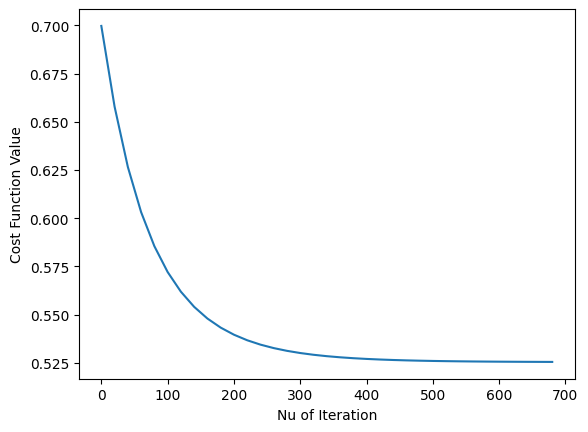

Test accuracy: 78.08538429808883%


In [ ]:
logistic_regression(x.T, y, x.T, y, learning_rate=0.01, nu_of_iteration=700)

In [ ]:
import numpy as np

class LogisticRegression:
    def __init__(self, lr=0.01, n_it=1000):
        self.lr= lr
        self.n_it = n_it
        self.weights = None
        self.bias = None
        self.losses = []

    def sigmoid(self, z):
        return 1 / (1+np.exp(-z))

    def compute_loss(self, y, y_pred):
        m = len(y)
        #binary cross etropy loss
        loss = (-1 / m) * np.sum(y*np.log(y_pred + 1e-6) + (1 - y)*np.log(1 - y_pred+ 1e-6))
        return loss

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        #gradient descent
        for _ in range(self.n_it):
            #linear model
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            #gradients
            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr* db

            loss = self.compute_loss(y, y_pred)
            self.losses.append(loss)

    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    def predict(self, X):
        #threshold is 0.5
        y_pred_prob = self.predict_proba(X)
        y_pred = [1 if i > 0.5 else 0 for i in y_pred_prob]
        return np.array(y_pred)


model = LogisticRegression(lr=0.001, n_it=1000)

In [ ]:
model.fit(x,y)

In [ ]:
print("Shape of X:", x.shape)
print("Shape of y:", y.shape)

Shape of X: (145460, 17)
Shape of y: (145460,)


In [ ]:
predictions = model.predict(x)
predictions

array([0, 0, 0, ..., 0, 0, 0])

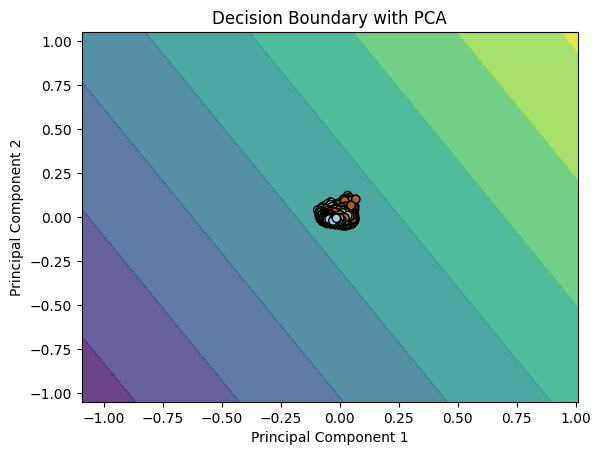

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

model.fit(x_pca,y)

x_min, x_max = x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1
y_min, y_max = x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary with PCA')

plt.show()

In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

model.fit(x_pca,y)

x_min, x_max = x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1
y_min, y_max = x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

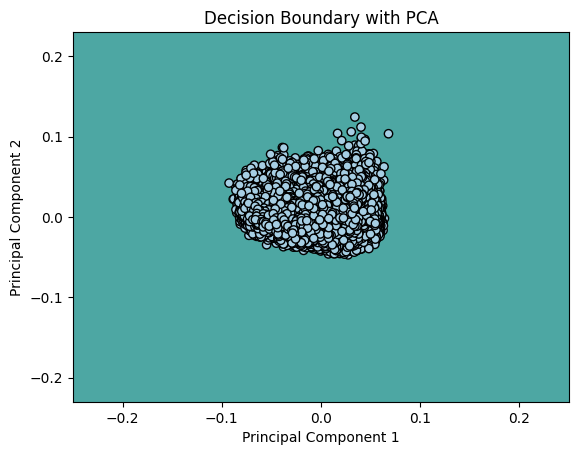

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.8)

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary with PCA')

plt.xlim(-0.25, 0.25)
plt.ylim(-0.23, 0.23)

plt.show()

###Dataset is so much scattered that it needs to be handelled with more advanced techniques like PCA, or t-SNE for dimensionality reduction and hence plotting

In [ ]:
X_list = x[["Sunshine", "Humidity9am", "Cloud3pm"]] #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = x["RainTomorrow"]
y = np.asarray(y_list, dtype=np.int32)

In [ ]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

<Figure size 1800x1400 with 0 Axes>

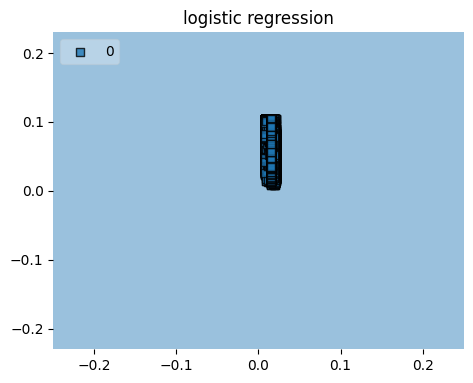

In [ ]:
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions

clf1 = LogisticRegression(lr=0.01, n_it=1000)

labels = ['logistic regression']

X = np.asarray(X_list, dtype=np.float32)
y = np.asarray(y_list, dtype=np.int32)

value = 0.5
width = 0.5

gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(18, 14))

for clf, lab, grd in zip([clf1],
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf,
                                filler_feature_values={2: value},
                                filler_feature_ranges={2: width},
                                legend=2)
    plt.title(lab)

plt.xlim(-0.25, 0.25)
plt.ylim(-0.23, 0.23)
plt.show()